In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Using the Pandas package, create a table of the distribution of the qualitative variable in the dataset, which should have the following structure:
- rows should represent individual categories;
- columns:
    - category name,
    - count,
    - percentage (rounded to two decimal places).

In [84]:
headers = ["sex", "length", "diameter", "height", "whole weight", "shucked weight", "viscera weight", "shell weight",
           "rings"]
data = pd.read_csv("data.csv", sep=',', names=headers)

qual_distr = pd.DataFrame(columns=[" ", "count", "%"])
male = data["sex"].value_counts().get('M', 0)
female = data["sex"].value_counts().get('F', 0)
infant = data.shape[0] - male - female
all_together = male + female + infant

qual_distr.loc[0] = ["Male", male, round(male / all_together, 2)]
qual_distr.loc[1] = ["Infant", infant, round(infant / all_together, 2)]
qual_distr.loc[2] = ["Female", female, round(female / all_together, 2)]
display(qual_distr)



,,count,%
0,Male,1528,0.37
1,Infant,1342,0.32
2,Female,1307,0.31


2. Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset, which should have the following structure:
- rows should represent individual variables;
- columns:
    - variable name,
    - arithmetic mean,
    - standard deviation,
    - minimum value,
    - 1st quartile,
    - 2nd quartile (median),
    - 3rd quartile,
    - maximum value.

In [85]:

quan_distr = pd.DataFrame(columns=[" ", "mean", "std", "min", "25%", "50%", "75%", "max"])
for x in range(1, len(headers)):
    table_col = []
    temp_data = data[headers[x]]
    table_col.append(headers[x])
    table_col.append(str(temp_data.mean()))
    table_col.append(str(temp_data.std()))
    table_col.append(str(temp_data.min()))
    table_col.append(str(temp_data.quantile(0.25)))
    table_col.append(str(temp_data.quantile(0.5)))
    table_col.append(str(temp_data.quantile(0.75)))
    table_col.append(str(temp_data.max()))
    quan_distr.loc[x - 1] = table_col
display(quan_distr)

,,mean,std,min,25%,50%,75%,max
0,length,0.5239920995930094,0.12009291256479956,0.075,0.45,0.545,0.615,0.815
1,diameter,0.40788125448886764,0.09923986613365945,0.055,0.35,0.425,0.48,0.65
2,height,0.13951639932966242,0.041827056607257274,0.0,0.115,0.14,0.165,1.13
3,whole weight,0.8287421594445774,0.4903890182309977,0.002,0.4415,0.7995,1.153,2.8255
4,shucked weight,0.35936748862820206,0.22196294903322014,0.001,0.186,0.336,0.502,1.488
5,viscera weight,0.1805936078525257,0.10961425025968446,0.0005,0.0935,0.171,0.253,0.76
6,shell weight,0.23883085946851804,0.1392026695223861,0.0015,0.13,0.234,0.329,1.005
7,rings,9.933684462532918,3.2241690320681284,1,8.0,9.0,11.0,29


3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.

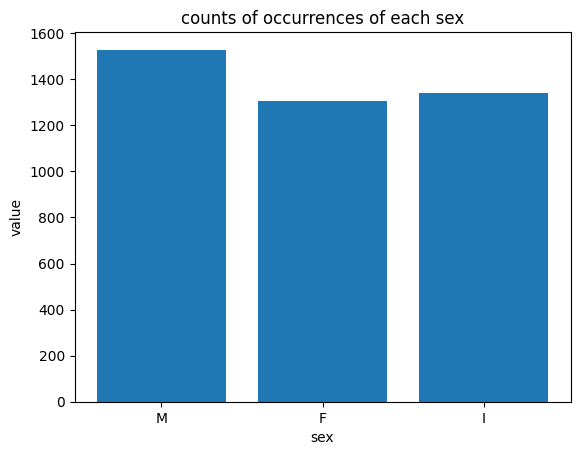

In [86]:
plt.bar(["M", "F", "I"], [male, female, infant])
plt.xlabel("sex")
plt.ylabel("value")
plt.title("counts of occurrences of each sex")
plt.show()

4. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.


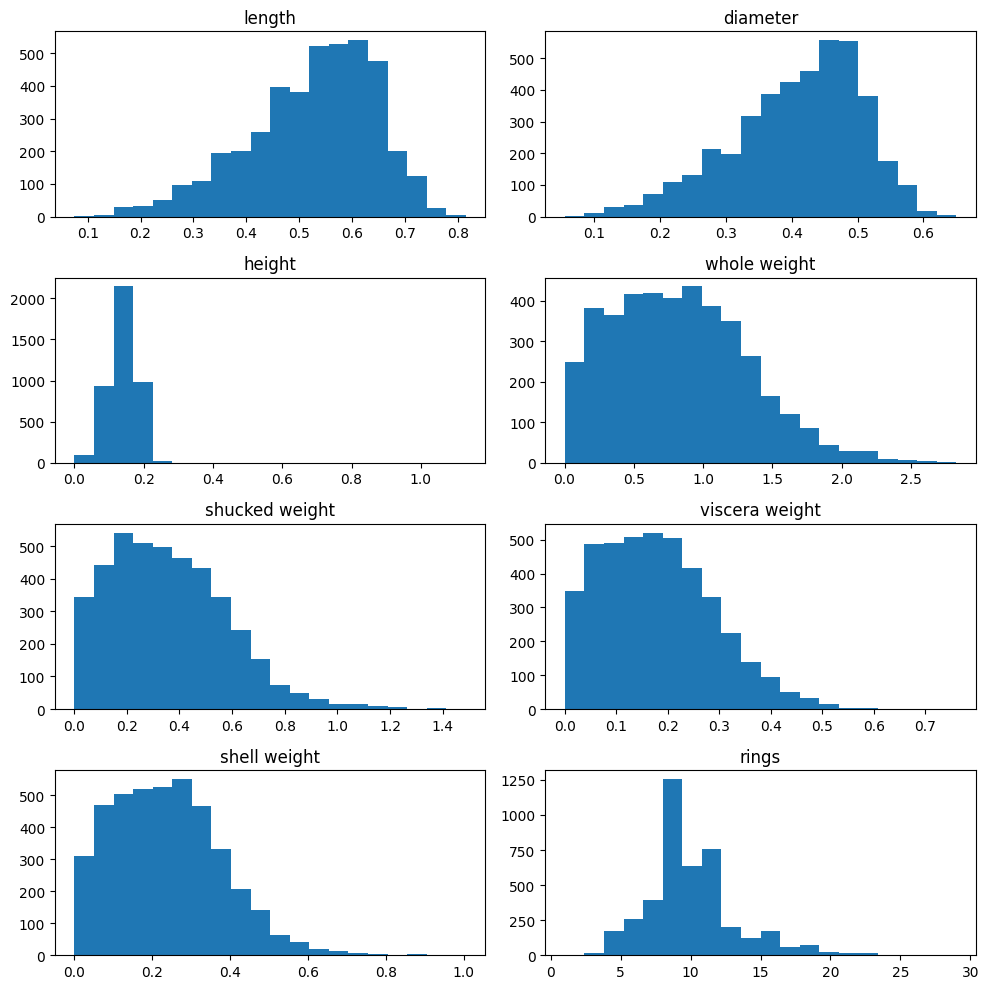

In [87]:
plt.subplots(4, 2, figsize=(10, 10))
for x in range(1, len(headers)):
    plt.subplot(4, 2, x)
    plt.hist(data[headers[x]], bins=20)
    plt.title(headers[x])
plt.tight_layout()
plt.show()

5. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed in a single figure spanning 14 rows and 2 columns.

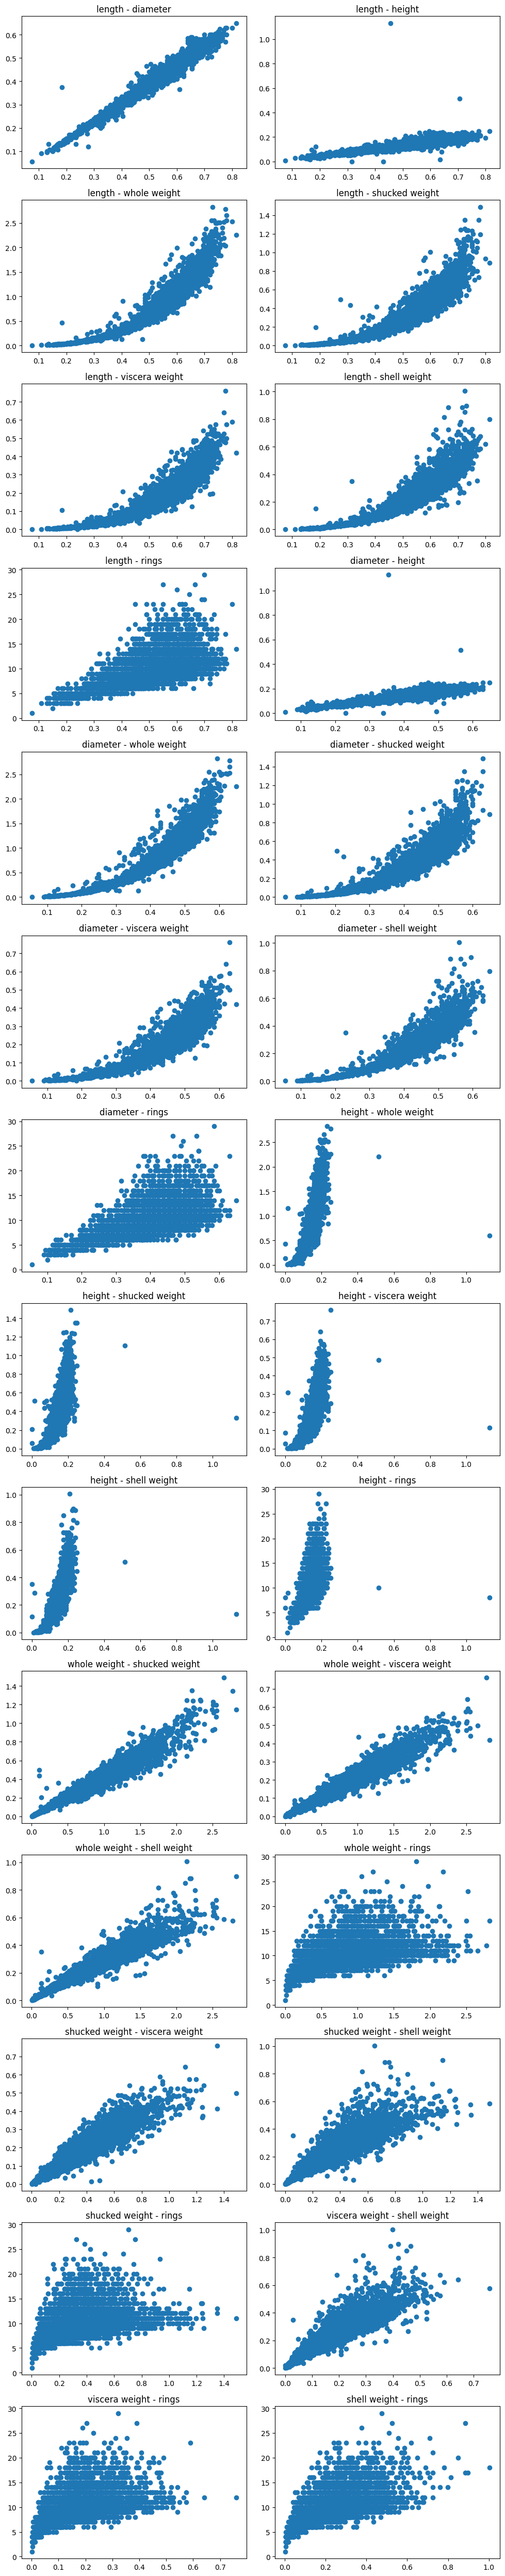

In [88]:
plt.subplots(14, 2, figsize=(10, 50))
index = 1
for x in range(1, len(headers) - 1):
    for y in range(x + 1, len(headers)):
        plt.subplot(14, 2, index)
        plt.scatter(data[headers[x]], data[headers[y]])
        plt.title(headers[x] + " - " + headers[y])
        index += 1
plt.tight_layout()
plt.show()
# TODO POPRAWIC JAK TO WYGLADA

6. Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset.

In [89]:
corr_matrix = data[data.columns[1:]].corr()
display(corr_matrix)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


7. Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

<Axes: >

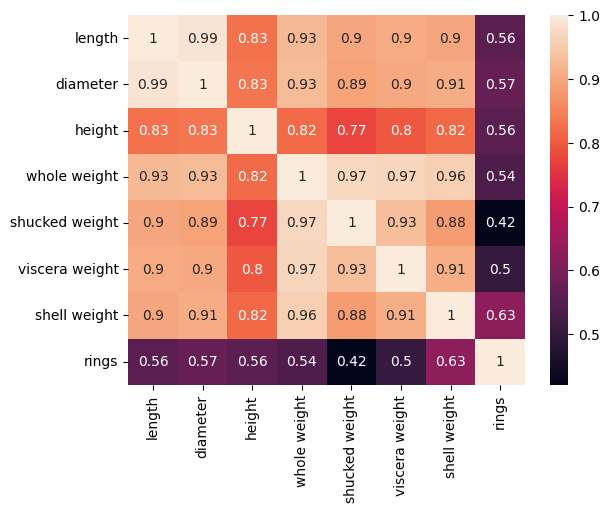

In [90]:
heatmap = sns.heatmap(corr_matrix, annot=True)
display(heatmap)

8. Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly correlated (the variables may be hardcoded).

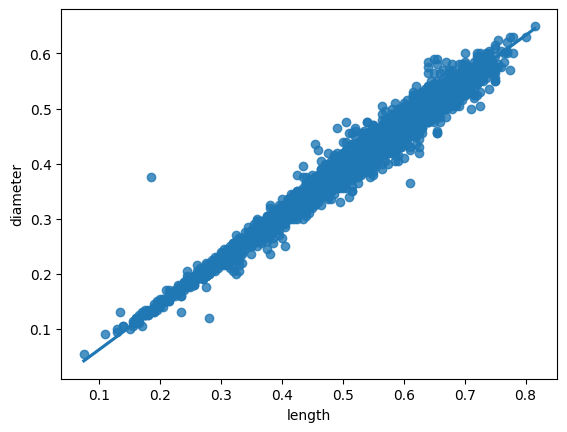

In [91]:
sns.regplot(x=data["length"], y=data["diameter"])
plt.show()

Requirements for the maximum grade of 5.0:

- 1. All requirements for the maximum grade of 4 should be satisfied.

- 2. Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable, which should have the following structure:
    - rows should represent combinations of individual quantitative variables and individual categories of the qualitative variable;
    - columns:
        - quantitative variable name,
        - qualitative variable category name,
        - arithmetic mean,
        - standard deviation,
        - minimum value,
        - 1st quartile,
        - 2nd quartile (median),
        - 3rd quartile,
        - maximum value.

In [92]:
# some code here

- 3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a boxplot of each quantitative variable in the dataset, grouping every one of them by the qualitative variable. All boxplots should be placed in a single figure spanning 4 rows and 2 columns.

In [93]:
# code